0.01090218641
0.654764097
0.654764097
0.09427379885
0.3270655923
0
0.09811967769
0
0.1505949739
0.04360874564
0
0.4000215328
0.01817031068
0.01817031068
0.01817031068
[ 1.09021864 65.4764097  65.4764097 ]


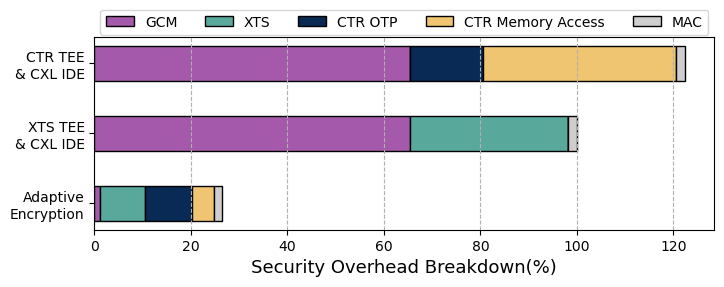

In [48]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl



ylabels=['Adaptive\nEncryption','XTS TEE\n& CXL IDE',"CTR TEE\n& CXL IDE"]
xlabels='Security Overhead Breakdown(%)'

n = len(ylabels)    # number of test systems
y = np.arange(n) 

wb = openpyxl.load_workbook(filename="breakdown.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value * 100)     
        print(value)            
b1=b1.reshape(5, 3)
print(b1[0])
     
width=0.5
stack_labels = ['GCM', 'XTS',"CTR OTP",'CTR Memory Access','MAC',]
colors = [ '#a559aa', '#59a89c', '#082a54', '#f0c571','#cecece','#e02b35']

allfigsize=(8,2.5)  
plt.figure(figsize=allfigsize)
bottom1 = np.zeros(n)
# m = len(stack_labels)
m = 5
for i in range(m):
    plt.barh(y, b1[i],  width, left=bottom1, label=stack_labels[i], color=colors[i], edgecolor='black', linewidth=1)    
    bottom1 += b1[i]

plt.grid(axis='x',linestyle='--')
plt.yticks(y,ylabels, fontsize=10, rotation=0)  
# plt.xticks([10,50,100,150],fontsize=13)
plt.xlabel(xlabels,fontsize=13)    
plt.legend(loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.18), fontsize=10)    
plt.savefig('breakdown.pdf',bbox_inches = 'tight')    
# plt.show(0)